# S-Bert Pipeline

In [5]:
from typing import List, Union, Tuple

from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from arqmath_code.Entities.Post import Question, Answer
from arqmath_code.topic_file_reader import Topic

## Simple example

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['This framework generates embeddings for each input sentence',
             'This framework creates embeddings for input sentences',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

embeddings = model.encode(sentences)

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173980e-02 -4.28515561e-02 -1.56286508e-02  1.40537312e-02
  3.95538285e-02  1.21796280e-01  2.94333734e-02 -3.17523777e-02
  3.54959518e-02 -7.93140382e-02  1.75878499e-02 -4.04369496e-02
  4.97259647e-02  2.54912600e-02 -7.18700662e-02  8.14968124e-02
  1.47069187e-03  4.79627140e-02 -4.50335406e-02 -9.92174447e-02
 -2.81769410e-02  6.45045564e-02  4.44671251e-02 -4.76217046e-02
 -3.52952220e-02  4.38671559e-02 -5.28565943e-02  4.32974688e-04
  1.01921484e-01  1.64072495e-02  3.26997079e-02 -3.45986448e-02
  1.21339923e-02  7.94870779e-02  4.58342349e-03  1.57778580e-02
 -9.68202204e-03  2.87626311e-02 -5.05806915e-02 -1.55794229e-02
 -2.87907310e-02 -9.62286349e-03  3.15556489e-02  2.27349084e-02
  8.71449336e-02 -3.85027863e-02 -8.84718671e-02 -8.75497423e-03
 -2.12343559e-02  2.08923556e-02 -9.02078226e-02 -5.25732487e-02
 -1.05638858e-02  2.88310666e-02 -1.61455218e-02  6.17834646e-03
 -1.23234

## Plotting embeddings

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(embeddings))
print(transformed)

          0         1
0 -0.384995 -0.242677
1 -0.383845 -0.312131
2 -0.156728  0.671490
3  0.925569 -0.116683


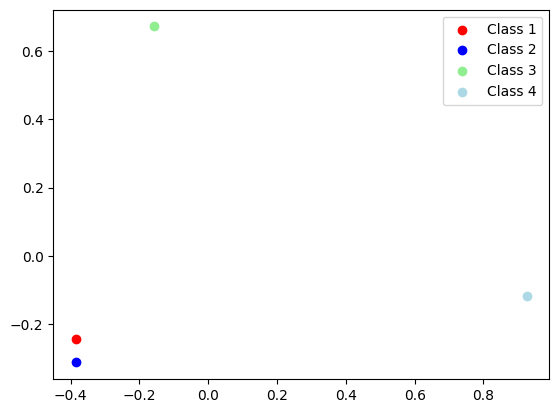

In [15]:
plt.scatter(transformed.iloc[0][0], transformed.iloc[0][1], label='Class 1', c='red')
plt.scatter(transformed.iloc[1][0], transformed.iloc[1][1], label='Class 2', c='blue')
plt.scatter(transformed.iloc[2][0], transformed.iloc[2][1], label='Class 3', c='lightgreen')
plt.scatter(transformed.iloc[3][0], transformed.iloc[3][1], label='Class 4', c='lightblue')

plt.legend()
plt.show()

## Simple and Basic S-Bert IR Model

In [16]:
from src import init_data
topic_reader, data_reader = init_data(task=1)

reading users
reading comments
reading votes
reading post links
reading posts


In [21]:
from src.base.model import Model
from sentence_transformers.util import cos_sim
from typing import List, Union, Tuple
from arqmath_code.topic_file_reader import Topic
from arqmath_code.Entities.Post import Question, Answer

class SimpleSBERT(Model):

    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def forward(self, queries: List[Topic], documents: List[Union[Question, Answer]]) -> List[
        Tuple[Topic, Union[Question, Answer], float]]:
        query_title_embeddings = self.model.encode([query.title for query in queries])
        print(query_title_embeddings)
        document_title_embeddings = self.model.encode([document.title for document in documents])
        print(document_title_embeddings)
        scores = cos_sim(query_title_embeddings, document_title_embeddings)
        print(scores)
        return

In [22]:
simple_sbert = SimpleSBERT()
simple_sbert(queries=[topic_reader.get_topic('A.301')], documents=data_reader.get_questions())

[[-1.29061472e-02  2.23316438e-02 -8.31117928e-02 -2.72941566e-03
  -3.45707312e-03  2.97866147e-02 -2.85315104e-02 -4.54308316e-02
  -4.17562276e-02  2.80389003e-03  1.54413441e-02  5.34175523e-02
   1.05627701e-01 -7.72482855e-03 -8.30636173e-02  4.42180857e-02
   7.77841657e-02 -4.27018814e-02 -3.86838354e-02  9.46554616e-02
   3.96756642e-02  5.00176847e-03  2.56925412e-02 -1.80593058e-02
   4.53390442e-02 -2.48141289e-02 -2.30054483e-02  2.50806846e-02
   1.23605086e-02  5.87545633e-02 -6.42315969e-02 -2.06621885e-02
   7.82177690e-03 -3.52533385e-02  6.23678556e-03 -6.32239133e-03
   1.08370118e-01  2.44677570e-02 -2.54395381e-02 -7.94087052e-02
  -1.52311102e-02  4.39768620e-02 -2.06946693e-02  4.52658087e-02
   2.85340417e-02 -5.06643653e-02  8.53446219e-03 -4.86618355e-02
  -1.60462316e-02 -9.63874757e-02 -1.04615055e-01  2.94456277e-02
   7.75107443e-02  1.22391451e-02 -8.02716166e-02 -7.74999559e-02
   1.03232721e-02  7.85895437e-02 -1.98797639e-02 -3.31051685e-02
   1.22298

KeyboardInterrupt: 